# CS-433 Project 1 by group twohundredbpm

## Useful imports

In [26]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
from cost import *
from gradients import *
from preprocessing import *
from cross_validation import *
from plot import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting data

In [5]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'Data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
DATA_TEST_PATH = 'Data/test.csv'  # TODO: download train data and supply path here
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Running cross-validation to get the best hyper-parameters

In [7]:
tX_cross = tX.copy()
tX_cross = preprocess(tX_cross)

In [8]:
print(np.logspace(-5, -2, 4))

[1.e-05 1.e-04 1.e-03 1.e-02]


In [49]:
performances = []
degrees = np.arange(9,14)
lambdas=np.logspace(-5, -2, 10)

for idx in range(len(tX)):
    train_x_jet = tX_cross[idx]
    train_y_jet = y[idx]
    test_x_jet = tX_test[idx]
    
    performance, best_params = cross_validation(train_y_jet, train_x_jet,
                     degrees=degrees, lambdas=lambdas)
    performances.append(performance)
    
    print("for model {}, the best parameters are : \n".format(idx+1),
          "degree = ", best_params[0], " lambda = ", best_params[1])

mean for  1e-05   0.8424813836175834
mean for  2.1544346900318823e-05   0.8427516214268556
mean for  4.641588833612782e-05   0.8427215950036032
mean for  0.0001   0.8428016654656095
mean for  0.00021544346900318823   0.8427816478501079
mean for  0.00046415888336127773   0.842621506926095
mean for  0.001   0.8424913924253343
mean for  0.002154434690031882   0.8426315157338458
mean for  0.004641588833612777   0.842281207462567
mean for  0.01   0.8417207142285209
mean for  1e-05   0.8229241732724798
mean for  2.1544346900318823e-05   0.8181299543598367
mean for  4.641588833612782e-05   0.8143466250300265
mean for  0.0001   0.8102730402754424
mean for  0.00021544346900318823   0.8001541356393626
mean for  0.00046415888336127773   0.8400792697573864
mean for  0.001   0.8402794459124029
mean for  0.002154434690031882   0.8270978461045719
mean for  0.004641588833612777   0.8102930578909439
mean for  0.01   0.8349347425734647
mean for  1e-05   0.8398090319481145
mean for  2.1544346900318823e-0

mean for  2.1544346900318823e-05   0.8363562533838657
mean for  4.641588833612782e-05   0.8361757805450281
mean for  0.0001   0.8362660169644468
mean for  0.00021544346900318823   0.8359953077061902
mean for  0.00046415888336127773   0.8359050712867714
mean for  0.001   0.835138061721711
mean for  0.002154434690031882   0.8342356975275221
mean for  0.004641588833612777   0.8315737231546653
mean for  0.01   0.8254376466341816
mean for  1e-05   0.8396047644829453
mean for  2.1544346900318823e-05   0.8394242916441076
mean for  4.641588833612782e-05   0.8394242916441076
mean for  0.0001   0.8393340552246885
mean for  0.00021544346900318823   0.8394242916441076
mean for  0.00046415888336127773   0.8395145280635264
mean for  0.001   0.8395145280635264
mean for  0.002154434690031882   0.83599530770619
mean for  0.004641588833612777   0.8327016783974011
mean for  0.01   0.8257083558924382
mean for  1e-05   0.8201136978884677
mean for  2.1544346900318823e-05   0.8272423750225592
mean for  4.641

### Displaying cross-validation results :

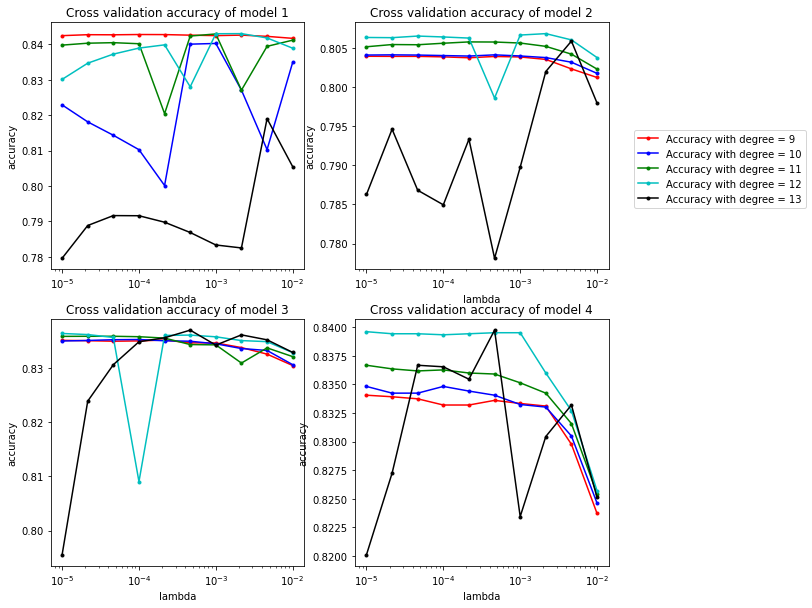

<Figure size 432x288 with 0 Axes>

In [57]:
display_cross_validation(performances, degrees)

## Building the model and retrieving prediction

In [58]:
# setting up parameters
# degrees = [11, 12, 13, 12]
# lambdas = [0.001009312, 0.001009312, 1.1212e-05, 0.0000696969]
degrees = [12, 12, 13, 13]
lambdas = [0.002, 0.002, 4.6e-4, 4.6e-4]

# Removing irrelevant columns from the jet groups:
tX = preprocess(tX)
tX_test = preprocess(tX_test)

# Instancing predictions
y_pred = []

In [59]:
# Building models
for idx in range(len(tX)):
    print("Beginning training on model ", idx+1)

    # extracting the values of specific group :
    train_x_jet = tX[idx]
    train_y_jet = y[idx]
    test_x_jet = tX_test[idx]

    # Polynomial feature expansion :
    tX_train_poly = polynomial_expansion(train_x_jet, degrees[idx])
    tX_test_poly = polynomial_expansion(test_x_jet, degrees[idx])

    w_, loss_ = ridge_regression(train_y_jet, tX_train_poly, lambdas[idx])

    accuracy_ = compute_accuracy(train_y_jet, tX_train_poly, w_)
    print('The accuracy of model {} is equal to {}'.format(int(idx+1), accuracy_))

    y_pred_jet = predict_labels(w_, tX_test_poly)

    y_pred.append(y_pred_jet)

Beginning training on model  1
The accuracy of model 1 is equal to 0.8437140312071503
Beginning training on model  2
The accuracy of model 2 is equal to 0.8070772722583307
Beginning training on model  3
The accuracy of model 3 is equal to 0.8366382818237758
Beginning training on model  4
The accuracy of model 4 is equal to 0.8395145280635264


In [60]:
%%capture
# Building back the prediction array from the sorted ones
y_total = np.zeros(len(np.hstack(ids_test)))

min_id_test = min(np.hstack(ids_test))

ids_total = np.arange(len(y_total))
ids_total += min_id_test

for jet_num in range(len(y)):
    for j in range(len(y_pred[jet_num])):
        y_total[ids_test[jet_num][j] - min_id_test] = y_pred[jet_num][j]

y_total.reshape(-1, 1)

## Building output

In [61]:
OUTPUT_PATH = "Data/doto.csv"
print('Building output file in ', OUTPUT_PATH)
create_csv_submission(ids_total, y_total, OUTPUT_PATH)

Building output file in  Data/doto.csv
